# Leaf Classification from Images

In [1]:
import numpy as np                     # numeric python lib
import pandas as pd

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # s

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder

from sklearn.cross_validation import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, log_loss

/Users/bhatnagarakshit10/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


img.shape

In [57]:
img = mpimg.imread('images/53.jpg')

Try to see the size of other images       

Don't feel like there is a big difference

In [3]:
X=pd.read_csv('/Users/bhatnagarakshit10/Documents/Kaggle/LeafClass/train.csv')

In [4]:
for i in range(1,1584):
    s = """images/{0}.jpg"""
    img = mpimg.imread(s.format(i))
    if img.shape > (924,1037):
        print i
        print img.shape

48
(951, 990)
122
(964, 984)
124
(1050, 1261)
234
(931, 621)
329
(951, 957)
354
(931, 1023)
389
(1004, 1380)
430
(971, 1043)
446
(1023, 1208)
501
(964, 957)
538
(964, 891)
568
(990, 1241)
573
(1089, 1261)
593
(964, 1235)
686
(1023, 845)
691
(1010, 951)
722
(971, 1109)
767
(931, 1050)
818
(951, 740)
957
(1056, 1254)
1060
(951, 1089)
1129
(924, 1116)
1350
(1043, 1188)
1379
(938, 1129)
1387
(977, 1043)
1391
(997, 1195)
1418
(997, 878)
1419
(957, 753)
1476
(1004, 799)


###### Extracting additional features

Extract count of non_zero pixels in each image

mpimg.imread() gives me an ndarray of pixel values with balck being zero and white ranging from 1 to 255

In [58]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [121]:
# reading the train and test data in dataframes
# good ones: 11, 19, 23, 27, 48, 53, 78, 218
cnt_nonzero_train = []
cnt_nonzero_test = []

#training data
x_train = pd.read_csv('/Users/bhatnagarakshit10/Documents/Kaggle/LeafClass/train.csv')

#test_data
x_test = pd.read_csv('/Users/bhatnagarakshit10/Documents/Kaggle/LeafClass/test.csv')

#adding another feature to get the non_zero pixels in the images
for i in x_train.id:
    s = """images/{0}.jpg"""
    cnt_nonzero_train.append(np.count_nonzero(mpimg.imread(s.format(i))))
    
for i in x_test.id:
    s = """images/{0}.jpg"""
    cnt_nonzero_test.append(np.count_nonzero(mpimg.imread(s.format(i))))

# using image processing module of scipy to find the center of the leaf
#cy, cx = ndi.center_of_mass(img)

#plt.imshow(img, cmap='Set3')  # show me the leaf
#plt.scatter(cx, cy)           # show me its center
#plt.show()

Extract another feature

Detect corners and find the distance of these points from the center

for each leaf we do the following:-

1.  get the center cx,cy
2.  get major edge points for the leaf say xi,yi
3.  calculate di = sqrt((xi-cx)^2 + (yi-cy)^2) 
4.  sum up all the di's and divide by number of points (we do this since each leaf has different # of points)

One more improvement we can do is to take the log of above values.

In [37]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

In [70]:
l_censure_train=[] #get corners using censure 
l_ch_train=[] #using corner harris
for i in x_train.id:
    s = """images/{0}.jpg"""
    img = mpimg.imread(s.format(i))
    
    cy, cx = ndi.center_of_mass(img)
    
    detector = CENSURE()
    detector.detect(img)
    
    coords = corner_peaks(corner_harris(img), min_distance=5)
    coords_subpix = corner_subpix(img, coords, window_size=13)
    
    #print len(detector.keypoints)
    
    tot=0
    for i in range(len(detector.keypoints)):
        tot += np.sqrt((detector.keypoints[i, 0] - cx) ** 2 + (detector.keypoints[i, 0] - cy) ** 2)
    tot = tot/(len(detector.keypoints)+1) #incase len(coords) is 0
    
    l_censure_train.append(tot)
    
    #print "done with censure"
    
    tot=0
    for i in range(len(coords)):
        tot += np.sqrt((coords[i, 0] - cx) ** 2 + (coords[i, 0] - cy) ** 2)
    tot = tot/(len(coords)+1) #incase len(coords) is 0
    l_ch_train.append(tot)
    
    

In [65]:
l_ch_train

[168.57043313489572,
 232.03685220192193,
 210.02224675595542,
 179.49742301399317,
 232.42389704017074,
 179.70868703830112,
 275.32965728922051,
 277.96203994690262,
 209.70176919945243,
 395.79563780145838,
 180.34469779391284,
 216.66773796994633,
 226.4132265046573,
 193.85974098182464,
 116.86809195996373,
 233.68165905795399,
 186.39077347211048,
 122.67981374451432,
 189.26791786759503,
 181.14261230474358,
 269.0024482410991,
 266.0366587582493,
 242.62666962929558,
 213.84119126256695,
 700.75044123850478,
 207.6581567465405,
 216.7364756562292,
 296.83209838871443,
 241.39153209874016,
 243.05361229206216,
 399.0930829136791,
 194.25313688101824,
 180.19276777589275,
 283.53147486852993,
 267.65646356828091,
 303.97581734333653,
 194.19917016171536,
 161.8665163192012,
 179.01442433833168,
 220.25285433931771,
 267.58020219228615,
 200.80624247701201,
 252.26233227882807,
 99.065493572983328,
 155.03364271307393,
 247.49428197859086,
 350.50731427942088,
 226.48048522282906,

###### Species are evenly distributed in the training set

In [6]:
label_dist={}

for i in x_train.species:
    label_dist[i]=0
    
for l in x_train.species:
    label_dist[l]+=1

In [7]:
label_dist

{'Acer_Capillipes': 10,
 'Acer_Circinatum': 10,
 'Acer_Mono': 10,
 'Acer_Opalus': 10,
 'Acer_Palmatum': 10,
 'Acer_Pictum': 10,
 'Acer_Platanoids': 10,
 'Acer_Rubrum': 10,
 'Acer_Rufinerve': 10,
 'Acer_Saccharinum': 10,
 'Alnus_Cordata': 10,
 'Alnus_Maximowiczii': 10,
 'Alnus_Rubra': 10,
 'Alnus_Sieboldiana': 10,
 'Alnus_Viridis': 10,
 'Arundinaria_Simonii': 10,
 'Betula_Austrosinensis': 10,
 'Betula_Pendula': 10,
 'Callicarpa_Bodinieri': 10,
 'Castanea_Sativa': 10,
 'Celtis_Koraiensis': 10,
 'Cercis_Siliquastrum': 10,
 'Cornus_Chinensis': 10,
 'Cornus_Controversa': 10,
 'Cornus_Macrophylla': 10,
 'Cotinus_Coggygria': 10,
 'Crataegus_Monogyna': 10,
 'Cytisus_Battandieri': 10,
 'Eucalyptus_Glaucescens': 10,
 'Eucalyptus_Neglecta': 10,
 'Eucalyptus_Urnigera': 10,
 'Fagus_Sylvatica': 10,
 'Ginkgo_Biloba': 10,
 'Ilex_Aquifolium': 10,
 'Ilex_Cornuta': 10,
 'Liquidambar_Styraciflua': 10,
 'Liriodendron_Tulipifera': 10,
 'Lithocarpus_Cleistocarpus': 10,
 'Lithocarpus_Edulis': 10,
 'Magnolia_H

###### We have extracted the extra feature above but let's first try to get the accuracy without it

In [118]:
#Image data preprocessing to convert the string labels into float
le = LabelEncoder().fit(x_train.species) 
labels = le.transform(x_train.species)

#Drop the species and id columns
x_train = x_train.drop(['species','id'],axis=1)

#Splitting the training set into training and validation set
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = x_train.values[train_index], x_train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

#Training the model
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

#Predicting the outcome and checking the accuracy
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print acc

0.979797979798


Now let's if we can improve the performance over the previous model by adding another feature

###### Please reset the dataframes before running the below code (Go to the additional features cell)

In [120]:
#Add pixel feature to the image training and test data
x_train['pixel_count1'] = cnt_nonzero_train
x_test['pixel_count2'] = cnt_nonzero_test

#Image data preprocessing to convert the string labels into float
le = LabelEncoder().fit(x_train.species) 
labels = le.transform(x_train.species)

#Drop the species and id columns
x_train = x_train.drop(['species','id'],axis=1)

#Splitting the training set into training and validation set
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = x_train.values[train_index], x_train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    
#Training the model
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

#Predicting the outcome and checking the accuracy
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print acc

0.984848484848


After adding Censure feature

In [122]:
#Add pixel feature to the image training and test data
x_train['pixel_count1'] = cnt_nonzero_train
x_test['pixel_count2'] = cnt_nonzero_test

#Add next feature to train
x_train['feature2'] = l_censure_train
x_train['feature3'] = l_ch_train

#Image data preprocessing to convert the string labels into float
le = LabelEncoder().fit(x_train.species) 
labels = le.transform(x_train.species)

#Drop the species and id columns
x_train = x_train.drop(['species','id'],axis=1)

#Splitting the training set into training and validation set
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = x_train.values[train_index], x_train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    
#Training the model
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

#Predicting the outcome and checking the accuracy
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)

print acc

0.989898989899


In [16]:
train_predictions

array([70,  4, 14, 50, 69, 82, 23, 55, 16, 30, 79, 25, 34, 77, 39, 45, 77,
       69, 78,  6, 32, 81, 89, 52, 46, 17, 94,  3, 63, 43, 26, 21,  9, 51,
       39, 93, 56, 97, 66, 23, 53, 64, 87, 67, 66, 85, 84, 62, 32, 91, 58,
       10, 65, 65, 38, 43, 89, 34, 25, 62, 44, 76, 52, 83, 40,  7, 48, 60,
       58, 35, 95, 78, 38,  7, 88, 97, 13, 83, 36, 12, 47, 87, 15, 55, 81,
       98, 24, 14,  1, 85, 37, 75, 80, 20, 49, 45, 61, 13,  3, 47, 40, 54,
       31, 18, 76, 96, 27, 29, 17, 50, 75, 94, 35, 19, 31, 46,  1, 63, 36,
       59, 71, 54, 24, 44,  9, 86,  2, 72, 49, 31, 84, 61, 51, 91,  2,  5,
       11, 28, 56,  8, 92, 21, 74, 68, 98, 28, 73, 90, 22, 64, 29, 48, 15,
       11, 59, 30, 18, 72, 57, 93, 92, 88, 82,  4, 16, 20, 27, 96, 12, 74,
       81, 22, 33,  0, 57, 10, 41, 19, 71, 80, 95, 53, 60, 67, 33, 70, 86,
        6,  5, 42, 79, 41, 26, 38,  8, 90, 42,  0])

Running it on actual test data

In [17]:
prob=clf.predict_proba(X_test)

In [22]:
x_test = pd.read_csv('/Users/bhatnagarakshit10/Documents/Kaggle/LeafClass/test.csv')

In [23]:
x_test['pixel_count2']=cnt_nonzero_test

In [24]:
x_test = x_test.drop(['id'],axis=1)

In [25]:
train_predictions = clf.predict(x_test)

In [26]:
train_predictions

array([51, 50,  1, 19, 14,  3,  3, 28, 84,  8, 43, 74, 75, 10, 52, 46, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18, 94,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29,  7, 31, 98, 92, 31, 25, 10, 61, 43, 85, 24,  1,
        2, 23, 83, 40, 22, 48, 90, 25, 21, 37, 56, 41, 95,  7, 89, 98, 77,
        3, 12, 31, 84, 53, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 34, 60, 17, 75, 27, 51, 31, 39, 23, 29,  2, 41, 61, 24, 97,
       28, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 26, 38, 43, 75, 20, 60, 46, 79, 22, 79, 69, 87, 65, 97,
       75, 21, 29, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 49, 89, 72, 36, 11, 81, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 61, 44, 89, 92, 13,  2, 59,  0, 96, 70, 32, 29, 78, 91,
       55, 44, 38,  5, 60

Corner detection

In [114]:
img = mpimg.imread('images/53.jpg')

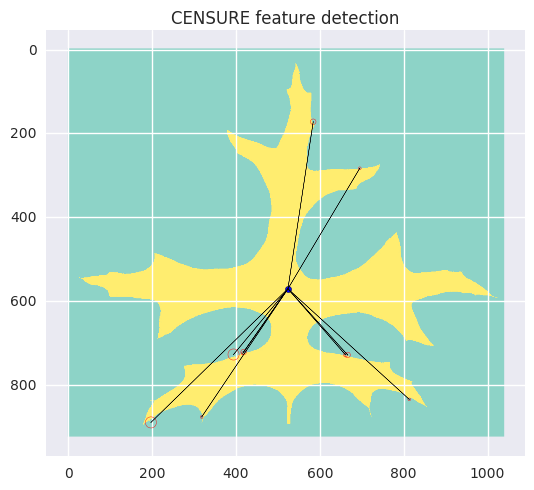

In [116]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

#coords = corner_peaks(corner_harris(img), min_distance=5)
#coords_subpix = corner_subpix(img, coords, window_size=13)

#print coords
#print detector.keypoints

cy, cx = ndi.center_of_mass(img)

#print cy,cx
#plt.imshow(img, cmap='Set3')  # show me the leaf
#plt.scatter(cx, cy)           # show me its center
#plt.show()

#plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img, cmap='Set3')
plt.scatter(cx, cy) 
#plt.scatter(detector.keypoints[0, 0],detector.keypoints[0, 1])
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
for i in range(len(detector.keypoints)):
    plt.arrow(cx,cy,detector.keypoints[i, 1]-cx,detector.keypoints[i, 0]-cy,head_width=1, head_length=0.1)

#plt.subplot(122)
#plt.title('Harris Corner Detection')
#plt.imshow(img, cmap='Set3')  # show me the leaf
#plt.scatter(cx, cy) 
#plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
#plt.show()

In [61]:
coords[1,0]

59

[[ 35 372]
 [ 45 253]
 [ 46 403]
 [ 51 187]
 [ 57 204]
 [ 86 136]
 [ 99 573]
 [111 621]
 [131 680]
 [148 703]
 [196 726]
 [210 709]
 [212 683]
 [233  88]
 [276 128]
 [285 569]
 [301 494]
 [306 540]
 [314 436]
 [316 463]
 [318 245]
 [319 477]
 [320 301]
 [320 475]]


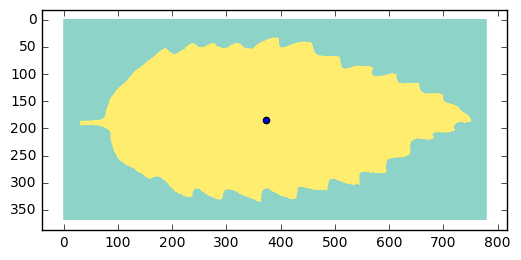

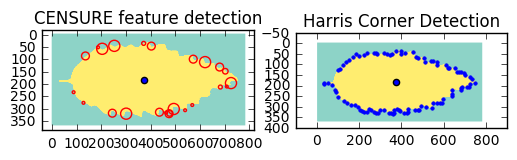

In [36]:
l=[]
for i in range(1,1584):
    s = """images/{0}.jpg"""
    img = mpimg.imread(s.format(i))
    
    cy, cx = ndi.center_of_mass(img)
    
    detector = CENSURE()
    detector.detect(img)
    
    tot=0
    for i in range(len(detector.keypoints)):
        tot += np.sqrt((detector.keypoints[:, 0] - cx) ** 2 + (detector.keypoints[:, 0] - cy) ** 2)
    tot = tot/len(detector.keypoints)
    
    l.append(tot)

    
    